<a href="https://colab.research.google.com/github/armandovl/curso_python/blob/main/Armando%20Vald%C3%A9s%20Educaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="">
   <h1>Clase de modelos de regresión</h1>
   <h4>Rezago Educativo y Pobreza<br>Armando Valdés López<br>Enero 2022</h4>
</div>
<br>

</div>
<div style="float:left;">
 <img src="https://pbs.twimg.com/profile_images/877925978361794564/uF8MEWoP_400x400.jpg"
        width="60"  style="" />
</div>
</div>

   
       
     

*archivo
*subir notebook
*github

In [ ]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## 01.-Entendimiento del Negocio

## 02.-Entendimiento de los Datos

<h5>Estado</h5>
<p>
<h5>por_des_15:</h5>Porcentaje de personas mayores de 15 años que no van a la escuela
<h5>po_per_pob:</h5>Porcentaje de la población en pobreza
<h5>por_sin_seg:</h5>Porcentaje de la población sin seguro social
<h5>por_car_salud:</h5>Porcentaje de la población con carencia por acceso a los servicios de salud
<h5>por_car_alim:</h5>Porcentaje de la población con carencia alimentaria
<h5>por_po_patr:</h5>Porcentaje con carencia de patrimonio: Insuficiencia del ingreso disponible para adquirir la canasta alimentaria
<h5>gini:</h5>Índice de Gini
<h5>por_car_haci:</h5>Porcentaje de la población en viviendas con carencia por hacinamiento
</p>


## 03.-Preparación de los Datos

## 04.-Modelado

## 05.-Evaluación del modelo

## 06.-Implementación

In [ ]:
# Estructura de los datos
Base_de_Datos= pd.read_excel('Avance_Metodos.xlsx')
Datos=pd.DataFrame(Base_de_Datos)
Datos.head(7)

,Estado,por_des_15,po_per_pob,por_sin_seg,por_car_salud,por_car_alim,por_po_patr,gini,por_car_haci
0,Aguascalientes,2.57861,30.531104,22.392571,18.849051,11.805700,41.900398,0.422628,3.346190
1,Baja California,4.72579,36.109801,23.602980,23.537939,11.150000,40.792099,0.420424,10.076050
2,Baja California Sur,5.38125,48.062796,18.186569,17.607830,10.155300,39.347900,0.443400,9.154690
3,Campeche,12.88437,60.545841,18.283230,20.905399,21.424200,52.135700,0.438455,26.500179
4,Coahuila de Zaragoza,3.86941,28.807374,37.289719,36.883629,4.392600,23.828199,0.351569,3.057200
5,Colima,10.50804,55.358292,16.319920,13.829610,27.773500,65.150002,0.371650,15.398750
6,Chiapas,13.90325,85.718552,37.795879,58.476822,54.707199,87.097801,0.340176,35.000290


In [ ]:
print("Resumen de Datos Cuantitativos")
summary.round(2).transpose()

Resumen de Datos Cuantitativos


,count,mean,std,min,25%,50%,75%,max
por_des_15,2456.0,13.98,9.63,0.56,6.48,11.82,18.99,66.55
po_per_pob,2456.0,67.42,18.52,8.75,55.62,69.86,82.55,97.35
por_sin_seg,2456.0,37.88,17.46,1.28,25.15,35.28,47.13,98.14
por_car_salud,2456.0,37.84,18.82,1.32,24.00,34.77,48.44,98.28
por_car_alim,2456.0,31.91,19.08,1.00,15.71,29.22,45.06,86.36
por_po_patr,2456.0,64.80,19.60,7.87,49.48,66.72,81.03,98.14
gini,2456.0,0.37,0.05,0.25,0.34,0.38,0.41,0.57
por_car_haci,2456.0,16.96,11.04,0.00,8.58,14.32,22.74,71.94


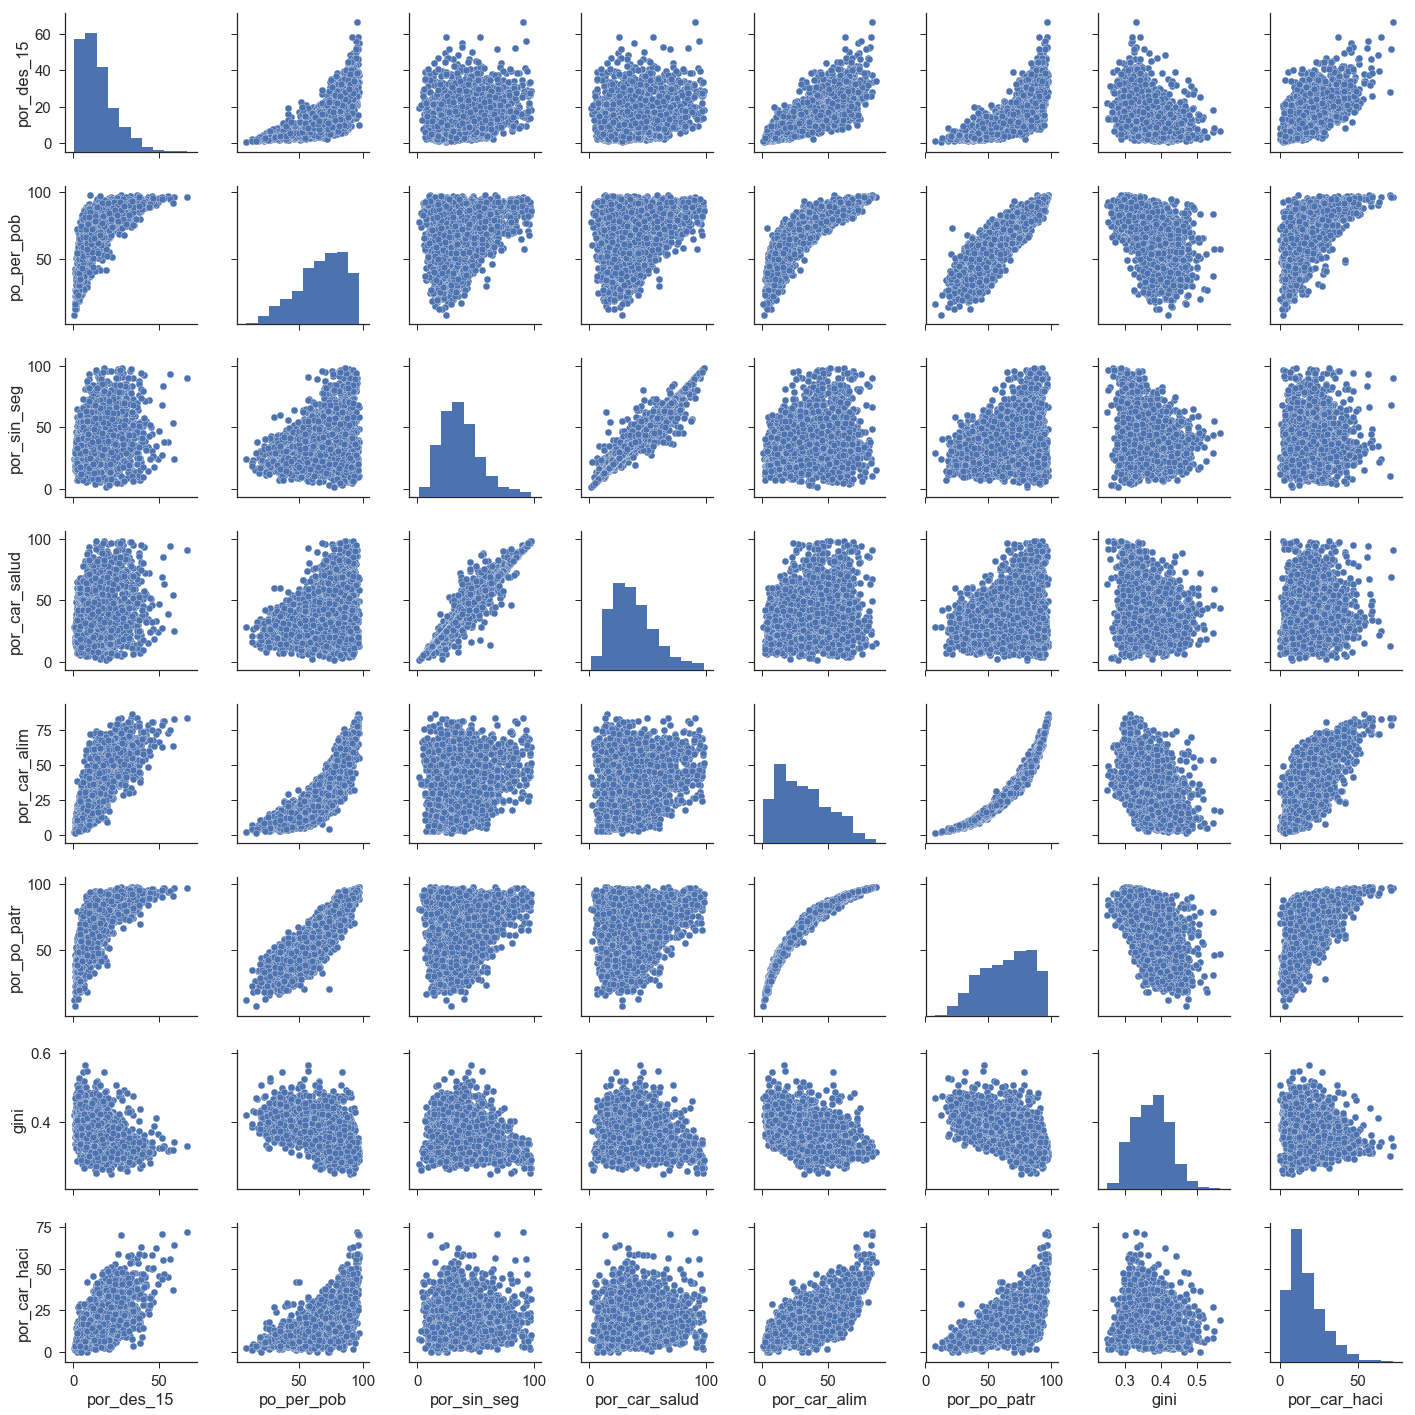

In [ ]:
sns.set(style="ticks",font_scale=1.5)
sns.pairplot(Datos)

In [ ]:
#Otro Gráfico de Matriz
from pandas.plotting import scatter_matrix
matrixChart=scatter_matrix(Datos,figsize=(16,12),alpha=0.05)
print(matrixChart)

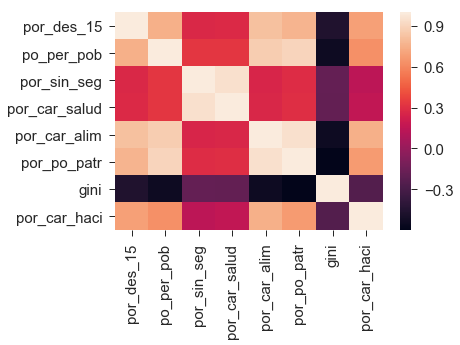

In [ ]:
corr = Datos.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

In [ ]:
corr = Datos.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(3).set_properties(**{'height':'30pt',
'color':'black'})

,por_des_15,po_per_pob,por_sin_seg,por_car_salud,por_car_alim,por_po_patr,gini,por_car_haci
por_des_15,1,0.754,0.273,0.278,0.82,0.773,-0.467,0.691
po_per_pob,0.754,1,0.33,0.33,0.871,0.903,-0.539,0.634
por_sin_seg,0.273,0.33,1,0.952,0.259,0.291,-0.182,0.144
por_car_salud,0.278,0.33,0.952,1,0.267,0.296,-0.189,0.16
por_car_alim,0.82,0.871,0.259,0.267,1,0.956,-0.538,0.756
por_po_patr,0.773,0.903,0.291,0.296,0.956,1,-0.599,0.672
gini,-0.467,-0.539,-0.182,-0.189,-0.538,-0.599,1,-0.255
por_car_haci,0.691,0.634,0.144,0.16,0.756,0.672,-0.255,1


In [ ]:
#por_des_15	po_per_pob /*****0.56******/
#por_des_15	por_sin_seg 0.07
#por_des_15	por_car_salud 0.07
#por_des_15	por_car_alim /**0.67**/
#por_des_15	por_po_patr /*****0.59******/
#por_des_15	gini 0.20
#por_des_15	por_car_haci 0.47

                            OLS Regression Results                            
Dep. Variable:             por_des_15   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     5047.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:39:48   Log-Likelihood:                -7674.9
No. Observations:                2456   AIC:                         1.535e+04
Df Residuals:                    2454   BIC:                         1.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7722      0.217      3.564   

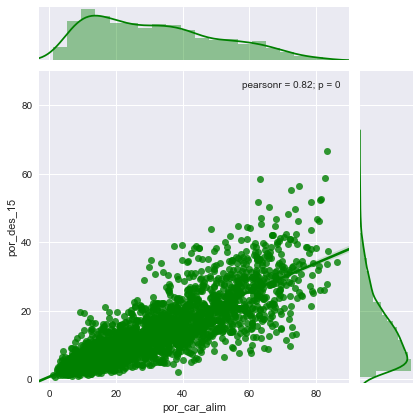

In [ ]:
sns.set(style="darkgrid")
g = sns.jointplot("por_car_alim", "por_des_15", data=Datos,kind="reg",
                  xlim=(-3, 90), ylim=(-1, 90), color="g")
from statsmodels.formula.api import ols #para entrenar el modelo con stats
model1 = ols("por_des_15 ~ por_car_alim", Datos).fit()
print(model1.summary())

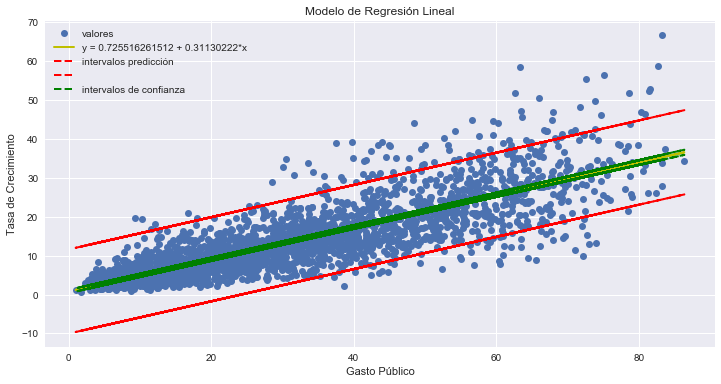

In [ ]:
x1=np.array(Datos.por_car_alim)
y1=np.array(Datos.por_des_15)
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(model1, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

plt.figure(figsize=(12,6))
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Gasto Público")
plt.ylabel("Tasa de Crecimiento")
plt.plot(x1,y1, 'o')
plt.plot(x1, fittedvalues, 'y-', lw=2)
plt.plot(x1, predict_ci_low, 'r--', lw=2)
plt.plot(x1, predict_ci_upp, 'r--', lw=2)
plt.plot(x1, predict_mean_ci_low, 'g--', lw=2)
plt.plot(x1, predict_mean_ci_upp, 'g--', lw=2)
plt.legend(["valores","y = 0.725516261512 + 0.31130222*x","intervalos predicción","" ,"intervalos de confianza"], loc="upper left")
plt.show()

In [ ]:
x2=np.array(Datos.po_per_pob).reshape((-1,1))
y2=np.array(Datos.por_des_15)

from sklearn.preprocessing import PolynomialFeatures
poli_reg=PolynomialFeatures(degree=2)

x2_pol=poli_reg.fit_transform(x2)

model2 = LinearRegression()


model2.fit(x2_pol,y2)

R_sq2=model2.score(x2_pol,y2)

print(R_sq2)




0.648177297759
